<a href="https://colab.research.google.com/github/JoseEnriqueMendo/EQ2_PROYECTO_BD/blob/main/EQ2_TGI_S16_APLICACI%C3%93N_FINAL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance


     |████████████████████████████████| 63 kB 605 kB/s 
     |████████████████████████████████| 6.4 MB 9.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install pystan fbprophet

In [ ]:
#@title  { run: "auto", display-mode: "form" }
#IMPORTACIÓN DE LIBRERIAS 
import math 
import pandas_datareader as web 
import pandas as pd
from pandas_datareader import data as pdr
from datetime import date
from datetime import timedelta
import yfinance as yf 
#Manupulación de la data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Libreria fbprobheat
from fbprophet import Prophet


[*********************100%***********************]  1 of 1 completed


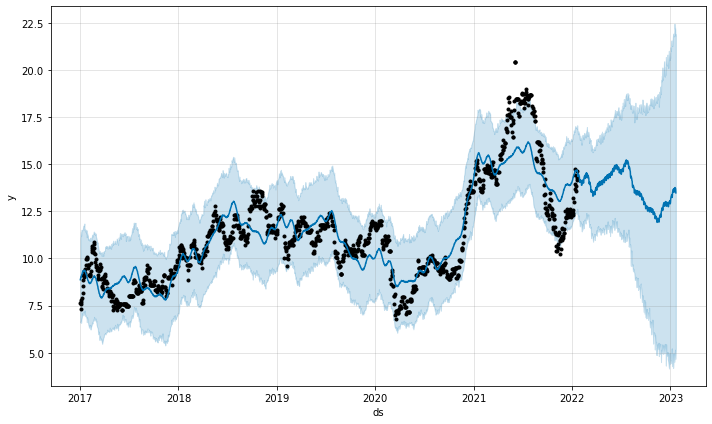

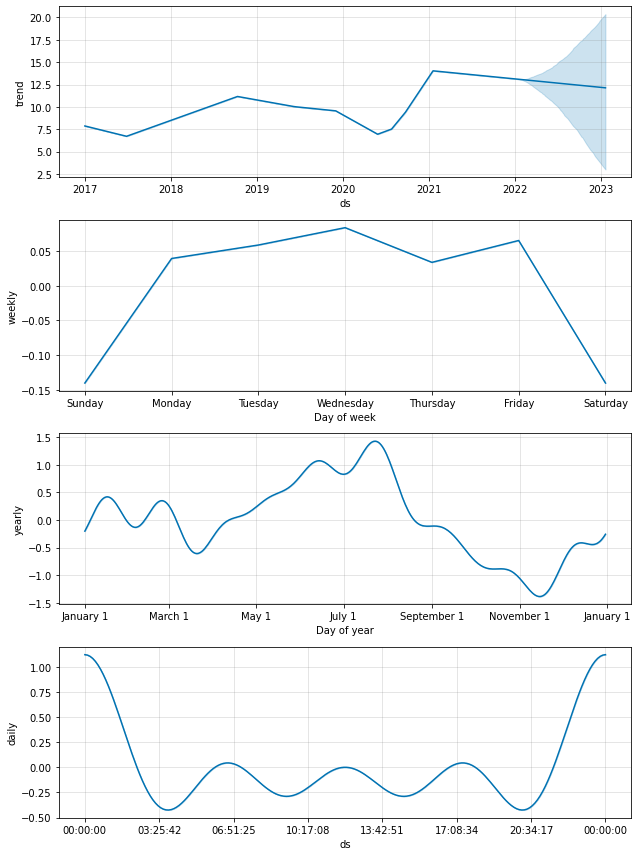

In [ ]:
#@title Lista de Empresas Mineras { run: "auto" }

lista='XVALO.MC' #@param ["XVOLB.MC","XVALO.MC","XUSI.MC","MAIFF","LGDTF","LRTNF","SILV","FSM","PAAS","AEM"]
Años_De_Prediccion = 1 #@param {type: "slider", min: 1 ,max:4, step:1 }
yf.pdr_override() 
final=(date.today()-timedelta(days=1)).strftime("%Y-%m-%d")
# Descargar el  dataframe
df = pdr.get_data_yahoo(lista, start="2017-01-01", end=final)

df['Date']=df.index

#Elimnar todo lo demas menos nuestra variable objetivo
df.drop( ['Open','High','Low','Adj Close','Volume'],axis=1,inplace= True)
df.columns=['y','ds']
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(df)
future =m.make_future_dataframe(periods=365*Años_De_Prediccion ,freq='D')
forecast=m.predict(future)
plot1 =m.plot(forecast)
Plot2=m.plot_components(forecast)



In [ ]:
df

,y,ds
Date,,
2017-01-02,7.650,2017-01-02
2017-01-03,7.325,2017-01-03
2017-01-04,7.560,2017-01-04
2017-01-05,7.795,2017-01-05
2017-01-06,7.685,2017-01-06
...,...,...
2022-01-17,13.850,2022-01-17
2022-01-18,14.146,2022-01-18
2022-01-19,14.400,2022-01-19
